# How do referees affect point spread? (Isaias Hernandez)

In [2]:
%pip install seaborn


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

C:\Users\isaia\AppData\Local\Temp\ipykernel_9416\2501538840.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# EDA   

**NBA_Referee_Assignments_21-22.cvs** was collected from the Official NBA website. The data in this csv represents the referees assigned to each game in the 2021-2022 NBA Season.  

In [4]:
game_outcomes = pd.read_csv('NBA_2021_2022_Bet_Outcomes.csv')
game_outcomes.head()

,Date,Rot,VH,Team,1st,2nd,3rd,4th,Final,Open,Close,ML,2H,Home/Away
0,1019,501,V,Brooklyn,25,34,26,19,104,240.5,233.5,105,2,0
1,1019,502,H,Milwaukee,37,29,31,30,127,pk,1.5,-125,114,1
2,1019,503,V,GoldenState,32,21,30,38,121,230.5,226.5,140,111.5,0
3,1019,504,H,LALakers,34,25,26,29,114,4.5,3.5,-160,pk,1
4,1020,505,V,Indiana,38,37,13,34,122,228.5,1.5,-125,110.5,0


In [5]:
referee_assignments = pd.read_csv('NBA_Referee_Assignments_21-22.csv')
referee_assignments.head()

,date,game visitor,chief,crew1,crew2
0,1019,Brooklyn,Josh Tiven,Jacyn Goble,Natalie Sago
1,1019,Golden State,Sean Wright,Mark Lindsay,Ray Acosta
2,1020,Indiana,Rodney Mott,Scott Wall,Nate Green
3,1020,Chicago,Tyler Ford,Derek Richardson,Mousa Dagher
4,1020,Boston,Scott Foster,Ed Malloy,Lauren Holtkamp


In [6]:
referee_stats = pd.read_csv('NBA_Referee_Stats_21-22.csv')
referee_stats.head()

,referee,role,experience,games officiated,home team win%,home team points differential,total points per game,called fouls per game,foul% against road teams,foul% against home team,foul differential
0,Ray Acosta,CREW,5,64,0.438,-1.344,222.813,39.500,50.316,49.684,0.3
1,Jacyn Goble,CREW,6,64,0.500,1.438,223.375,40.703,49.559,50.442,-0.4
2,Natalie Sago,CREW,4,63,0.524,2.333,223.952,39.540,50.501,49.498,0.4
3,Mitchell Ervin,CREW,8,63,0.492,-0.222,224.190,40.746,49.864,50.136,-0.1
4,Gediminas Petraitis,CREW,8,60,0.533,-0.150,226.083,40.933,52.118,47.883,1.7


In [7]:
game_outcomes = game_outcomes.drop(game_outcomes[(game_outcomes['Date'] > 410) & (game_outcomes['Date'] < 700)].index) # Keeps only the NBA regular season games


# Makes data more uniform
game_outcomes['Team'] = game_outcomes['Team'].replace('LAClippers', 'LA Clippers')
game_outcomes['Team'] = game_outcomes['Team'].replace('LALakers', 'LA Lakers')
game_outcomes['Team'] = game_outcomes['Team'].replace('GoldenState', 'Golden State')
game_outcomes['Team'] = game_outcomes['Team'].replace('SanAntonio', 'San Antonio')
game_outcomes['Team'] = game_outcomes['Team'].replace('NewYork', 'New York')
game_outcomes['Team'] = game_outcomes['Team'].replace('OklahomaCity', 'Oklahoma City')
game_outcomes['Team'] = game_outcomes['Team'].replace('NewOrleans', 'New Orleans') 

# pk means the spread was zeroed out
game_outcomes['Open'] = game_outcomes['Open'].replace('pk', 0) 
game_outcomes['Close'] = game_outcomes['Close'].replace('pk', 0) 
game_outcomes.head()


,Date,Rot,VH,Team,1st,2nd,3rd,4th,Final,Open,Close,ML,2H,Home/Away
0,1019,501,V,Brooklyn,25,34,26,19,104,240.5,233.5,105,2,0
1,1019,502,H,Milwaukee,37,29,31,30,127,0,1.5,-125,114,1
2,1019,503,V,Golden State,32,21,30,38,121,230.5,226.5,140,111.5,0
3,1019,504,H,LA Lakers,34,25,26,29,114,4.5,3.5,-160,pk,1
4,1020,505,V,Indiana,38,37,13,34,122,228.5,1.5,-125,110.5,0


In [8]:
# Now that there are no strings in data we can perform EDA operations 
game_outcomes['Open'] = game_outcomes['Open'].astype(float)
game_outcomes['Close'] = game_outcomes['Close'].astype(float)

In [9]:
game_outcomes.describe()

,Date,Rot,1st,2nd,3rd,4th,Final,Open,Close,ML,Home/Away
count,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2458.000000,2460.000000,2460.000000
mean,623.336585,540.322764,27.947967,27.907724,27.600813,26.607317,110.615854,112.988211,113.581977,-46.077236,0.500000
std,455.617776,23.583530,6.061007,5.975143,5.992404,6.062594,12.620400,107.739311,107.623855,409.242595,0.500102
min,101.000000,501.000000,8.000000,9.000000,8.000000,8.000000,75.000000,0.000000,0.000000,-4000.000000,0.000000
25%,211.000000,520.000000,24.000000,24.000000,24.000000,22.000000,102.000000,5.000000,5.500000,-220.000000,0.000000
50%,330.000000,540.000000,28.000000,28.000000,28.000000,27.000000,110.000000,18.500000,199.500000,-110.000000,0.500000
75%,1117.000000,560.000000,32.000000,32.000000,32.000000,31.000000,119.000000,220.500000,220.500000,190.000000,1.000000
max,1231.000000,600.000000,48.000000,49.000000,55.000000,48.000000,158.000000,244.500000,246.500000,1400.000000,1.000000


In [10]:
# Cleaning data so we know what rows correspond to what game
# In the original NBA_2021_2022_Bet_Outcomes.csv the information from one game was spread out
# between two rows. We will not assign an index that identifies two rows with the game num
def assign_game_numbers(game):
    game['Game'] = game.index[0] // 2 + 1
    return game

game_outcomes = game_outcomes.groupby(game_outcomes.index // 2).apply(assign_game_numbers)
game_outcomes.to_csv('visiting_team.csv', sep=',', index=False, encoding='utf-8')


In [11]:
# Calculate the final score difference
# This is the actual point spread, we will not worry about what team won or lost
final_diff = game_outcomes.merge(game_outcomes, on='Game', suffixes=('_away', '_home'))

final_diff = final_diff[final_diff['VH_away'] == 'V']
final_diff = final_diff[final_diff['VH_home'] == 'H']

# Takes the difference based on home team differential, this also corresponds to referee stats data
final_diff['Final Score Difference'] = abs(final_diff['Final_home'] - final_diff['Final_away'])

# Select relevant columns
score_diffs = final_diff[['Final Score Difference']]
score_diffs.reset_index(drop=True, inplace=True)
score_diffs.to_csv('home_score_diff.csv', sep=',', index=False, encoding='utf-8')

score_diffs.head()

,Final Score Difference
0,23
1,7
2,1
3,6
4,15


In [12]:
# Get the point spread, since data is mixed we look for max point spread which is 22 as opening bet
point_spreads = game_outcomes[game_outcomes['Open'] < 31].reset_index(drop=True)
# table holds the rows that contain the opening point spread
point_spreads.describe()
# Table holds nba outcomes 


,Date,Rot,1st,2nd,3rd,4th,Final,Open,Close,ML,Home/Away,Game
count,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000
mean,624.056818,540.428571,28.966721,28.623377,28.221591,26.995942,113.362825,5.752029,26.599432,-317.264610,0.654221,614.660714
std,455.693708,23.594801,6.002141,6.136893,5.810611,5.992073,12.667427,3.691274,62.659914,370.095693,0.475815,355.543851
min,101.000000,501.000000,10.000000,9.000000,11.000000,9.000000,77.000000,0.000000,0.000000,-4000.000000,0.000000,1.000000
25%,211.000000,520.000000,25.000000,24.000000,24.000000,23.000000,104.000000,3.000000,4.000000,-360.000000,0.000000,306.750000
50%,330.000000,540.000000,29.000000,28.000000,28.000000,27.000000,114.000000,5.000000,6.500000,-215.000000,1.000000,614.500000
75%,1117.000000,560.000000,33.000000,33.000000,32.000000,31.000000,122.000000,8.000000,10.000000,-150.000000,1.000000,922.250000
max,1231.000000,599.000000,48.000000,49.000000,55.000000,48.000000,157.000000,22.000000,242.500000,700.000000,1.000000,1230.000000


In [13]:
# Get the Chief referee home team points differential
ref_spreads = referee_stats[referee_stats['role'] == 'CHIEF'].reset_index(drop=True)
ref_spreads = ref_spreads[['referee','home team points differential']]

ref_spreads.head()
len(ref_spreads)

46

In [40]:
# merging all data to put into the ML model
dfs = [referee_assignments[['chief']], point_spreads[['Open']], score_diffs]
ref_v_open = pd.concat(dfs, axis=1)
ref_v_open = ref_v_open.drop(ref_v_open.index[-2:])
ref_v_open = ref_v_open.rename(columns={'chief': 'referee'})
ref_v_open = ref_v_open.merge(ref_spreads, on='referee')
ref_v_open = ref_v_open.rename(columns={'home team points differential': 'ref spread for home team'})


ref_v_open.to_csv('visiting_refs.csv', sep=',', index=False, encoding='utf-8')

In [15]:
# Function to placing a bet 'yes' or 'no' based on difference
def calculate_difference(row):
    diff = row['Final Score Difference'] <= (row['Open'] - row['ref spread for home team']*2) 
    if diff:
        return 'yes'
    else:
        return 'no'

# add new column if its a good bet
ref_v_open['should bet?'] = ref_v_open.apply(calculate_difference, axis=1)
ref_v_open.to_csv('visiting_refs.csv', sep=',', index=False, encoding='utf-8')
# ref_v_open has the following attributes
# (referee, Open, Final Score Difference, home team points differential, result)
# Place bet on over if the opening bet is less than half the 


# Visualizations

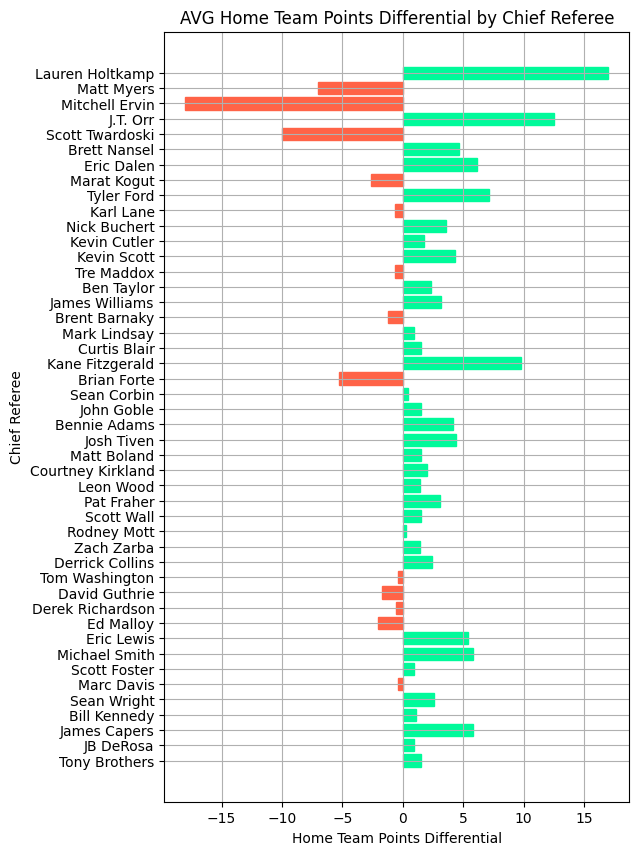

In [136]:
import matplotlib.pyplot as plt

chief_refs = referee_stats[referee_stats['role'] == 'CHIEF']

plt.figure(figsize=(6, 10))
graph = plt.barh(chief_refs['referee'], chief_refs['home team points differential'])
plt.xlabel('Home Team Points Differential')
plt.ylabel('Chief Referee')
plt.title('AVG Home Team Points Differential by Chief Referee')
plt.grid()

for bar, diff in zip(graph, chief_refs['home team points differential']):
    if diff > 0:
        bar.set_color('mediumspringgreen')
    else:
        bar.set_color('tomato')
plt.show()

**Created by Isaias Hernandez**

This graph is displaying the Home Team Points differential for every Chief Referee. We used this data to learn more about which referee could give bettors an advantage by comparing the opening sportbooks Point Spread a referee's home team point spread and their individual point spreads for all games they refereed throughout the season. 

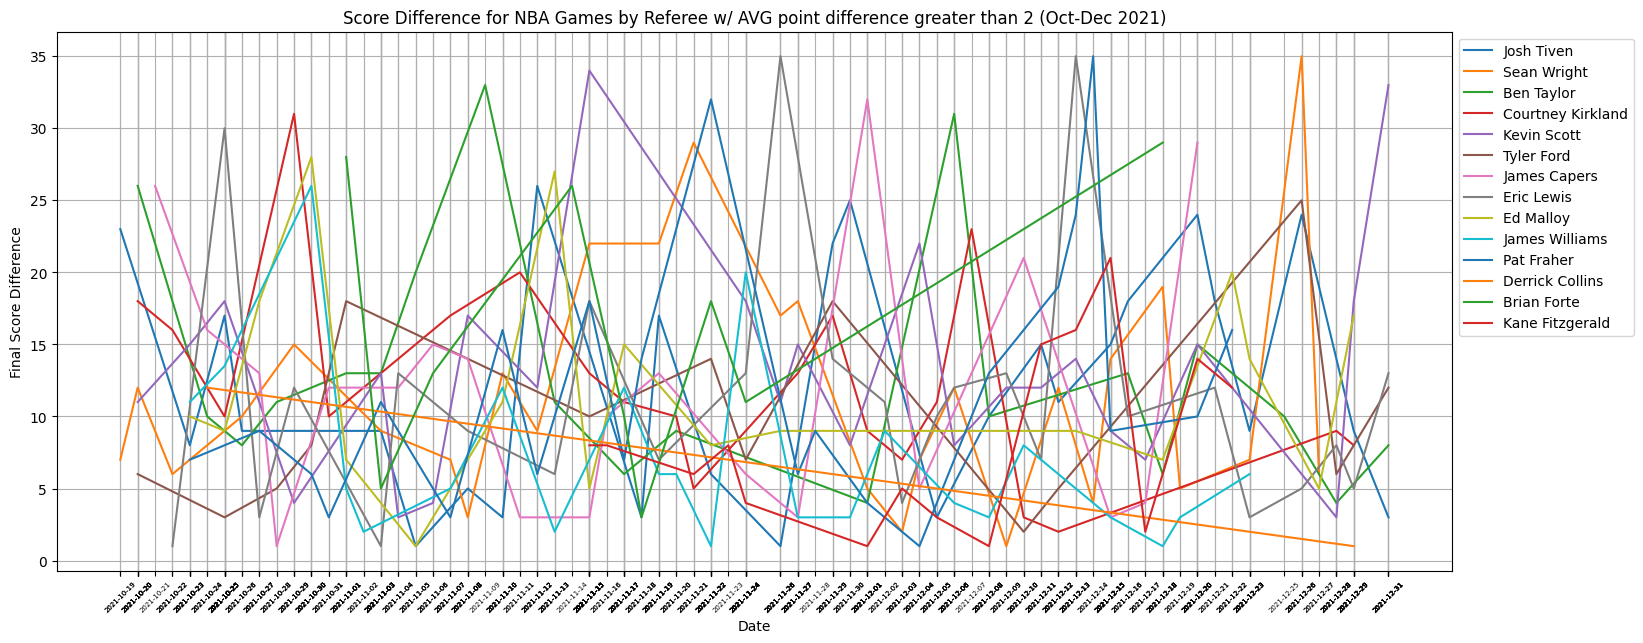

In [135]:
import matplotlib.pyplot as plt

gms = [point_spreads[['Date']], referee_assignments[['chief']], point_spreads[['Open']], score_diffs]
df = pd.concat(gms, axis=1)
df = df.drop(df.index[-2:])
df = df.rename(columns={'chief': 'referee'})
df = df.merge(ref_spreads, on='referee')
df.loc[df['Date'] > 910, 'Date'] *= 100
df.loc[df['Date'] > 91000, 'Date'] += 21
df = df[df['Date'] > 91000]
df = df[(df['home team points differential'] > 2) | (df['home team points differential'] < -2)]
df = df[df['Final Score Difference'] < 50]
df['Date'] = pd.to_datetime(df['Date'].astype(str), format='%m%d%y')

# Group by Date and Referee and get the mean of Final_Score_Difference
df_grouped = df.groupby(['Date', 'referee']).mean().reset_index()
# Plotting
plt.figure(figsize=(18, 7))
for referee in df_grouped['referee'].unique():
    df_referee = df_grouped[df_grouped['referee'] == referee]
    plt.plot(df_referee['Date'], df_referee['Final Score Difference'], label=referee)

plt.xlabel('Date')
plt.ylabel('Final Score Difference')
plt.title('Score Difference for NBA Games by Referee w/ AVG point difference greater than 2 (Oct-Dec 2021)')
plt.legend( bbox_to_anchor=(1, 1))
plt.xticks(df['Date'], rotation=45, fontsize=5)
plt.grid(True)
plt.show()

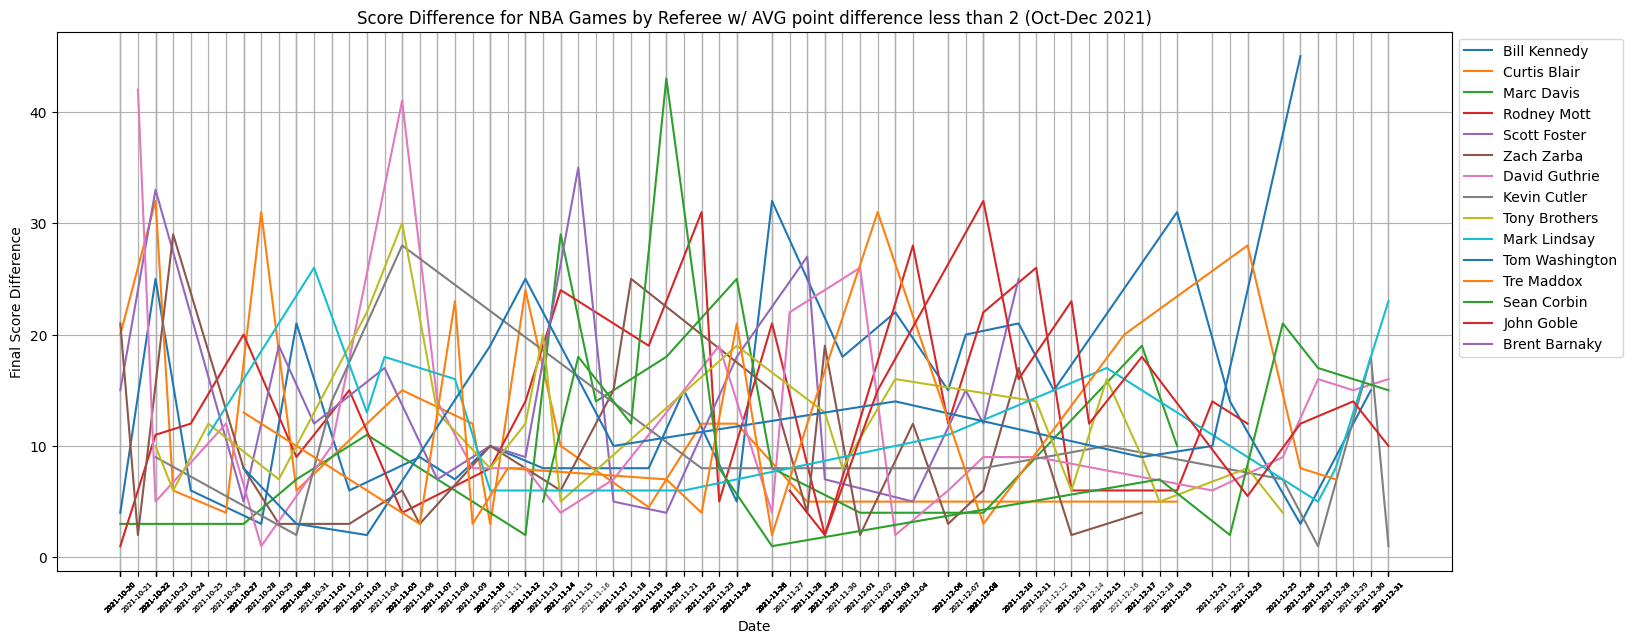

In [101]:
gms = [point_spreads[['Date']], referee_assignments[['chief']], point_spreads[['Open']], score_diffs]
df = pd.concat(gms, axis=1)
df = df.drop(df.index[-2:])
df = df.rename(columns={'chief': 'referee'})
df = df.merge(ref_spreads, on='referee')
df.loc[df['Date'] > 910, 'Date'] *= 100
df.loc[df['Date'] > 91000, 'Date'] += 21
df = df[df['Date'] > 91000]
df = df[(df['home team points differential'] < 2) & (df['home team points differential'] > -2)]
df = df[df['Final Score Difference'] < 50]
df['Date'] = pd.to_datetime(df['Date'].astype(str), format='%m%d%y')

# Group by Date and Referee and get the mean of Final_Score_Difference
df_grouped = df.groupby(['Date', 'referee']).mean().reset_index()
# Plotting
plt.figure(figsize=(18, 7))
for referee in df_grouped['referee'].unique():
    df_referee = df_grouped[df_grouped['referee'] == referee]
    plt.plot(df_referee['Date'], df_referee['Final Score Difference'], label=referee)

plt.xlabel('Date')
plt.ylabel('Final Score Difference')
plt.title('Score Difference for NBA Games by Referee w/ AVG point difference less than 2 (Oct-Dec 2021)')
plt.legend( bbox_to_anchor=(1, 1))
plt.xticks(df['Date'], rotation=45, fontsize=5)
plt.grid(True)
plt.show()

**Created by Isaias Hernandez**

These two graphs show the point differential for every referee depending on the day they refereed. The first graph takes into account the referees that averaged greater than 2 points differentials through the 21-22’ NBA season and the second graph displays referees that averaged less than 2 points differential for the same season. Although both graphs show big spikes, the second graph shows much more uniform score differentials. When we looked deeper into the referees that averaged less than 2 points differentials we found most of them had greater years of experience as chief referees.

# Machine Learning 

In [16]:
from sklearn.calibration import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

label_encoder = LabelEncoder()
ref_v_open['should bet?'] = label_encoder.fit_transform(ref_v_open['should bet?'])

# Define X and y
X = ref_v_open[['referee', 'Open']]  # Features
y = ref_v_open['should bet?']              # Target

# One-hot encode 'referee' column
column_transformer = ColumnTransformer(
    [('encoder', OneHotEncoder(), [0])], 
    remainder='passthrough'
)
X_encoded = column_transformer.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

print(len(y_pred), y_pred)


246 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [20]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.8739837398373984
Precision: 0.6
Recall: 0.18181818181818182
F1-score: 0.27906976744186046


In [18]:
print(sum(y_pred) / len(y_pred) * 100)

4.0650406504065035


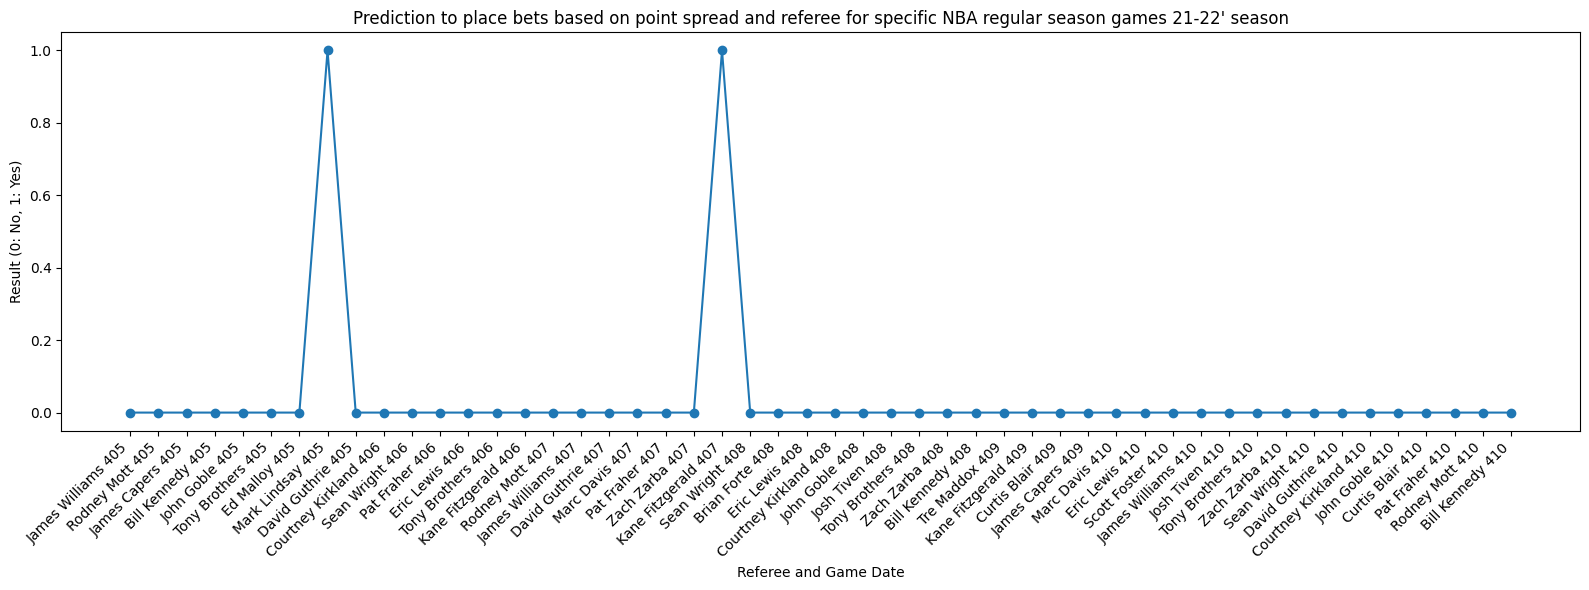

In [19]:
import matplotlib.pyplot as plt

referee_assignments['Referee_Game'] = referee_assignments['chief'] + ' ' + referee_assignments['date'].astype(str)

# Extract the last 246 items
last_246_df = referee_assignments.tail(50)

# Plot
plt.figure(figsize=(16, 6))
plt.plot(last_246_df['Referee_Game'], y_pred[-50:], marker='o', linestyle='-')
plt.xlabel('Referee and Game Date')
plt.ylabel('Result (0: No, 1: Yes)')
plt.title('Prediction to place bets based on point spread and referee for specific NBA regular season games 21-22\' season')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Created by Isaias Hernandez** 

Point spreads usually open 12 to 20 hours before an NBA game. Referees are usually always assigned at 9am the day of the game. This means if a game is at 7pm, a bettor can have an advantage if they know that a certain referee keeps games close. This ML model shows that if the opening point spread is greatly different than what the game referee averages then the bettor should place a bet. Assumptions we are making in order to clean our data is that the highest opening spread recorded was 22. The predictions are based on the last 50 regular season games for the 21-22 regular season.

## Insights & Results

When the model was completed we found that only about 4% of games are worth betting on out of the 257 games we tested the model on. These findings show that NBA referees are almost always correct in the way they call the game. Our inference is that most people think referees make bad decisions but that is only because as fans we remember specific calls and forget to think about the other 90% of calls that the referees actually got correct throughout the game.